In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns",100)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_csv("gender_classification_v7.csv")

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
df.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [6]:
df.sample(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
407,1,13.5,5.8,1,0,1,1,Male
1025,1,13.8,6.2,1,1,1,1,Male
4985,1,14.0,5.3,0,0,0,0,Female
3888,1,11.4,5.6,0,0,0,0,Female
1645,1,13.1,6.2,0,0,0,0,Female
2079,1,14.1,5.5,1,0,0,0,Female
4806,1,11.6,6.0,1,1,1,1,Male
2239,1,13.2,5.4,1,1,1,1,Male
3259,1,13.3,6.4,1,0,0,0,Female
3538,1,11.5,6.3,0,0,0,0,Female


In [7]:
df.shape

(5001, 8)

In [8]:
df.columns.tolist()

['long_hair',
 'forehead_width_cm',
 'forehead_height_cm',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long',
 'gender']

* long hair: uzun saç
* forehead_width_cm: alın genişliği
* forehead_height_cm: alın yüksekliği
* nose_wide: burun genişliği
* nose_long: burun uzunluğu
* lips_thin: dudak inceliği
* distance_nose_to_lip_long: burun-dudak arası uzunluk
* gender: Cinsiyet

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [10]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [11]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


In [16]:
df['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

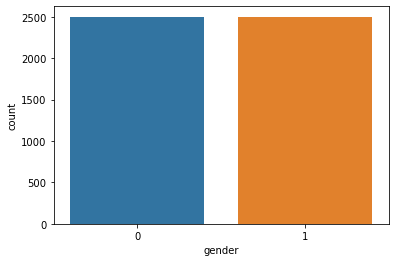

In [41]:
sns.countplot(df['gender'])

In [18]:
df['gender']=df['gender'].replace(['Female', 'Male'], [1,0])

In [19]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,1
4997,1,11.9,5.4,0,0,0,0,1
4998,1,12.9,5.7,0,0,0,0,1
4999,1,13.2,6.2,0,0,0,0,1


In [20]:
x = df.iloc[:,0:8].values
y = df.iloc[:,-1].values

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=42)

In [25]:
g.fit(x,y)  

GaussianNB()

In [26]:
b.fit(x,y) 

BernoulliNB()

In [29]:
tahmin1=g.predict(x)

In [30]:
accuracy_score(tahmin1,y)

1.0

In [31]:
tahmin2=b.predict(x)

In [32]:
accuracy_score(tahmin2,y)

1.0

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier()
classifier1.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
classifier1TrainScore = round(classifier1.score(x_train,y_train)*100,2)
classifier1TestScore = round(classifier1.score(x_test,y_test)*100,2)
print("Model's training accuracy = " + str(classifier1TrainScore)+"%")
print("Model's test accuracy = " + str(classifier1TestScore)+"%")

Model's training accuracy = 99.85%
Model's test accuracy = 99.7%


In [42]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)
       
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        print("\n {} confusion_matrix".format(item))
        print(confusion_matrix(y_test,item.predict(x_test)))
        print("\n {} classification_report".format(item))
        print(classification_report(y_test,item.predict(x_test)))

        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
      
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    classification_funct.result=result.sort_values('f1_score',ascending=False)
  

In [43]:
classification_funct(x,y)


 GaussianNB() confusion_matrix
[[487   0]
 [  0 514]]

 GaussianNB() classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       487
           1       1.00      1.00      1.00       514

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001


 BernoulliNB() confusion_matrix
[[487   0]
 [  0 514]]

 BernoulliNB() classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       487
           1       1.00      1.00      1.00       514

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001


 KNeighborsClassifier() confusion_matrix
[[485   2]
 [  2 512]]

 KNeighborsClassifier() classification_report
              precision    recall  f1-score   su

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
h=GradientBoostingClassifier()

In [45]:
h.fit(x,y)

GradientBoostingClassifier()

In [46]:
tahmin3=h.predict(x)

In [47]:
confusion_matrix(tahmin3,y)

array([[2500,    0],
       [   0, 2501]], dtype=int64)

In [48]:
print(classification_report(tahmin3,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500
           1       1.00      1.00      1.00      2501

    accuracy                           1.00      5001
   macro avg       1.00      1.00      1.00      5001
weighted avg       1.00      1.00      1.00      5001



# Pycaret 

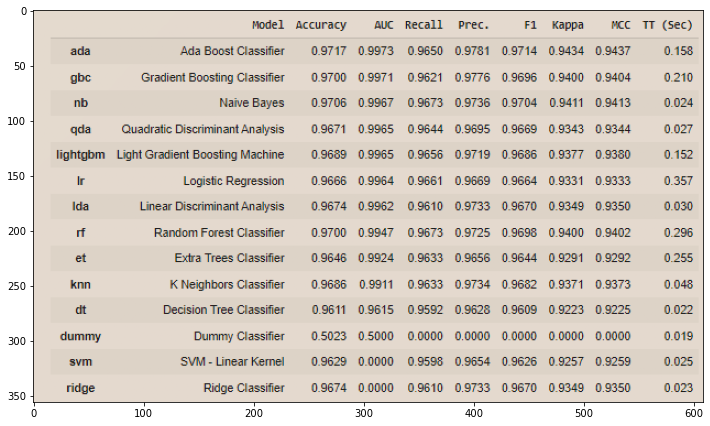

In [51]:
plt.figure(figsize=(12,12))
img=plt.imread('tempsnip.png')
plt.imshow(img)
plt.show();

# Ada Boost Classifier ile başarı oranım: %97,17